## Let's Start the Programming

First of all we need to load some libaries which are going to help us to analyze and visualize the data.

In [601]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import accuracy_score



%matplotlib inline

After load libraries, we need to read and display the data frame.

In [602]:
data = pd.read_csv('/content/drive/MyDrive/SVM/powerconsumption_New.csv')
data.head()

,Temperature,Humidity,voltage,current,Power
0,6.559,73.8,0.083,0.051,0.004233
1,6.414,74.5,0.083,0.070,0.005810
2,6.313,74.5,0.080,0.062,0.004960
3,6.121,75.0,0.083,0.091,0.007553
4,5.921,75.7,0.081,0.048,0.003888


In [616]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  1 non-null      float64
 1   Humidity     1 non-null      float64
dtypes: float64(2)
memory usage: 144.0 bytes
None


In [624]:
data.select_dtypes(include=['object']).head()

""
0


In [605]:
# prices = all features except those with object type value
# prices_objects = all features with object type value
data_objects = data.select_dtypes(include=['object']).copy()
datas = data.select_dtypes(exclude=['object']).copy()
data_objects.head()

""
0
1
2
3
4


In [620]:
datas.head()

,Temperature,Humidity,voltage,current
0,6.559,73.8,0.083,0.051
1,6.414,74.5,0.083,0.070
2,6.313,74.5,0.080,0.062
3,6.121,75.0,0.083,0.091
4,5.921,75.7,0.081,0.048


In [607]:
datas = datas.drop(['Power'],axis=1)
datas.isnull().sum()

Temperature    0
Humidity       0
voltage        0
current        0
dtype: int64

In [608]:
X=datas.drop(['voltage','current'],axis=1)
print(X)
y=datas['voltage']
z=datas['current']

      Temperature  Humidity
0           6.559     73.80
1           6.414     74.50
2           6.313     74.50
3           6.121     75.00
4           5.921     75.70
...           ...       ...
1195       14.910     67.13
1196       14.910     67.10
1197       14.910     66.89
1198       14.910     65.93
1199       14.970     63.73

[1200 rows x 2 columns]


##  Support Vector Machine for Polynomial Regression

In [609]:
clf1 = SVR(C=0.000000001000, epsilon=0.01, kernel='poly')
clf2 = SVR(C=0.00000000010000000, epsilon=0.00000010000, kernel='poly')
#regr = RandomForestRegressor(max_depth=3)
# clf1 = SVR(C=0.00001, epsilon=0.01, kernel='poly')
# clf2 = SVR(C=0.000000010, epsilon=0.00009, kernel='poly')

In [610]:
clf1.fit(X, y)

#regr.fit(Xtrain_pca, Ytrain)

SVR(C=1e-09, epsilon=0.01, kernel='poly')

In [611]:
clf2.fit(X,z)

SVR(C=1e-10, epsilon=1e-07, kernel='poly')

In [612]:
test=np.array([6.414,74.5])
data = pd.DataFrame(test.reshape(-1,len(test)),columns=('Temperature','Humidity'))
volt= clf1.predict(data)
curr= clf2.predict(data)
print(volt)
print(curr)
#Ypredict = regr.predict(Xtest_pca)

[0.0825]
[0.08100031]


In [613]:
pow=volt*curr
print(pow)

[0.00668253]


In [614]:
temp=float(input("Enter the Temperature: "))
humi=float(input("Enter the Humidity: "))
test=np.array([temp,humi])
data = pd.DataFrame(test.reshape(-1,len(test)),columns=('Temperature','Humidity'))
volt= clf1.predict(data)
curr= clf2.predict(data)
print(volt)
print(curr)
pow=volt*curr
print(pow)

Enter the Temperature: 6.559
Enter the Humidity: 72.5
[0.0825]
[0.08100034]
[0.00668253]


Enter the Temperature: 6.545
Enter the Humidity: 76.5
The Power is :[0.00668252] 



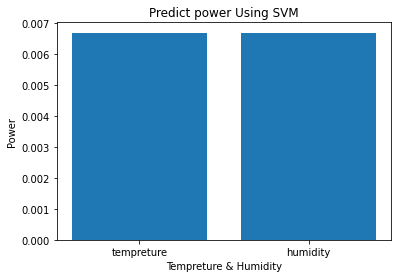

In [615]:
temp=float(input("Enter the Temperature: "))
humi=float(input("Enter the Humidity: "))
test=np.array([temp,humi])
data = pd.DataFrame(test.reshape(-1,len(test)),columns=('Temperature','Humidity'))
volt= clf1.predict(data)
curr= clf2.predict(data)
pow = np.array(volt*curr)
print("The Power is :{} ".format(pow))
print()

x = np.array(['tempreture','humidity'])
y = np.array([v])
plt.xlabel('Tempreture & Humidity')
plt.ylabel('Power')
plt.title('Predict power Using SVM')
plt.bar(x,y)
plt.show()
# X=accuracy_score(np.array([[0, 1], [1, 1]]), np.ones((2, 2)))